In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We perform preprocessing and label encoding to perform decision tree classifier and then identify the case of overfitting.

In [ ]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
X = df_cleaned.drop(columns=["id", "stroke"])
y = df_cleaned["stroke"]

In [ ]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_train)
y_pred2=clf.predict(X_test)

we will try to compare y_pred with respect to x_train once and x_test once to identify the case of overfitting.

In [ ]:
accuracy_score(y_train,y_pred)

1.0

In [ ]:
accuracy_score(y_test,y_pred2)

0.9041095890410958

This is the case of over fitting as the tree performed good on training data but bad on test data.

[Text(0.48303916827853, 0.9782608695652174, 'x[0] <= 67.5\ngini = 0.087\nsamples = 4088\nvalue = [3901, 187]'),
 Text(0.2009107027724049, 0.9347826086956522, 'x[0] <= 47.5\ngini = 0.043\nsamples = 3396\nvalue = [3322, 74]'),
 Text(0.3419749355254674, 0.9565217391304348, 'True  '),
 Text(0.06112185686653772, 0.8913043478260869, 'x[4] <= 56.3\ngini = 0.01\nsamples = 2211\nvalue = [2200, 11]'),
 Text(0.04074790457769181, 0.8478260869565217, 'x[3] <= 58.115\ngini = 0.009\nsamples = 2202\nvalue = [2192, 10]'),
 Text(0.012379110251450677, 0.8043478260869565, 'x[3] <= 58.06\ngini = 0.063\nsamples = 61\nvalue = [59, 2]'),
 Text(0.008252740167633785, 0.7608695652173914, 'x[3] <= 57.925\ngini = 0.033\nsamples = 60\nvalue = [59, 1]'),
 Text(0.0041263700838168925, 0.717391304347826, 'gini = 0.0\nsamples = 55\nvalue = [55, 0]'),
 Text(0.012379110251450677, 0.717391304347826, 'x[3] <= 57.935\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.008252740167633785, 0.6739130434782609, 'gini = 0.0\nsam

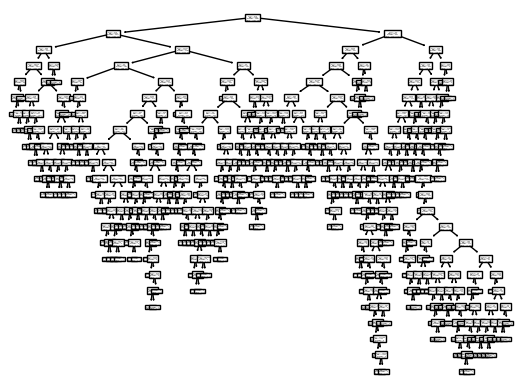

In [ ]:
tree.plot_tree(clf)

Now lets do paramter tuning.

In [ ]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
y_pred=clf.predict(X_train)
y_pred2=clf.predict(X_test)
accuracy_score(y_train,y_pred)

0.9547455968688845

In [ ]:
accuracy_score(y_test,y_pred2)

0.9393346379647749

Therefore here after tuning the parameters where we set the depth limit as 5 ( as after we check beyond 6 the tree is prone to overfit more and more after the depth 8) and we set entropy over gini criterion as entropy is more precise than gini as it uses log and information gain for its calculations, we get a good accuracy score on both train and test data, i.e, there is a balance between overfittiing and underfitting.
Hence this eliminated the case of overfitting.

[Text(0.38636363636363635, 0.9166666666666666, 'x[0] <= 53.5\nentropy = 0.268\nsamples = 4088\nvalue = [3901, 187]'),
 Text(0.13068181818181818, 0.75, 'x[0] <= 44.5\nentropy = 0.076\nsamples = 2604\nvalue = [2580, 24]'),
 Text(0.2585227272727273, 0.8333333333333333, 'True  '),
 Text(0.045454545454545456, 0.5833333333333334, 'x[4] <= 23.95\nentropy = 0.033\nsamples = 2035\nvalue = [2028, 7]'),
 Text(0.022727272727272728, 0.4166666666666667, 'entropy = 0.0\nsamples = 792\nvalue = [792, 0]'),
 Text(0.06818181818181818, 0.4166666666666667, 'x[14] <= 0.5\nentropy = 0.05\nsamples = 1243\nvalue = [1236, 7]'),
 Text(0.045454545454545456, 0.25, 'x[3] <= 58.14\nentropy = 0.078\nsamples = 729\nvalue = [722.0, 7.0]'),
 Text(0.022727272727272728, 0.08333333333333333, 'entropy = 0.485\nsamples = 19\nvalue = [17, 2]'),
 Text(0.06818181818181818, 0.08333333333333333, 'entropy = 0.06\nsamples = 710\nvalue = [705, 5]'),
 Text(0.09090909090909091, 0.25, 'entropy = 0.0\nsamples = 514\nvalue = [514, 0]'),


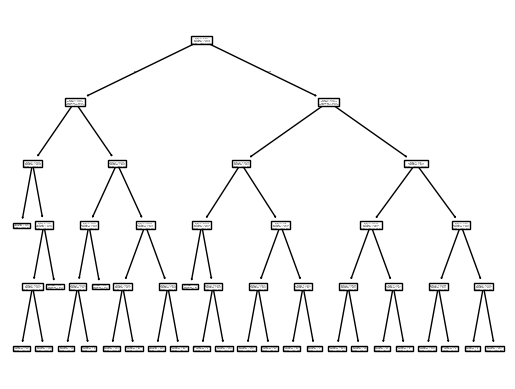

In [ ]:
tree.plot_tree(clf)